Today, We will predict tesla stock price. Let's start!

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

C:\Users\Al-Masa\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('Tesla.csv')

In [7]:
df.sample(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2011-06-24,27.639999,27.969999,27.260000,27.570000,3608500,27.570000
2012-02-02,29.719999,30.879999,29.610001,30.250000,805700,30.250000
2010-11-22,31.570000,33.450001,31.500000,33.400002,1529700,33.400002
2016-11-21,185.039993,188.889999,184.410004,184.520004,4361000,184.520004
2014-03-11,236.500000,244.600006,232.429993,234.410004,8810100,234.410004


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [5]:
df.shape

(1692, 6)

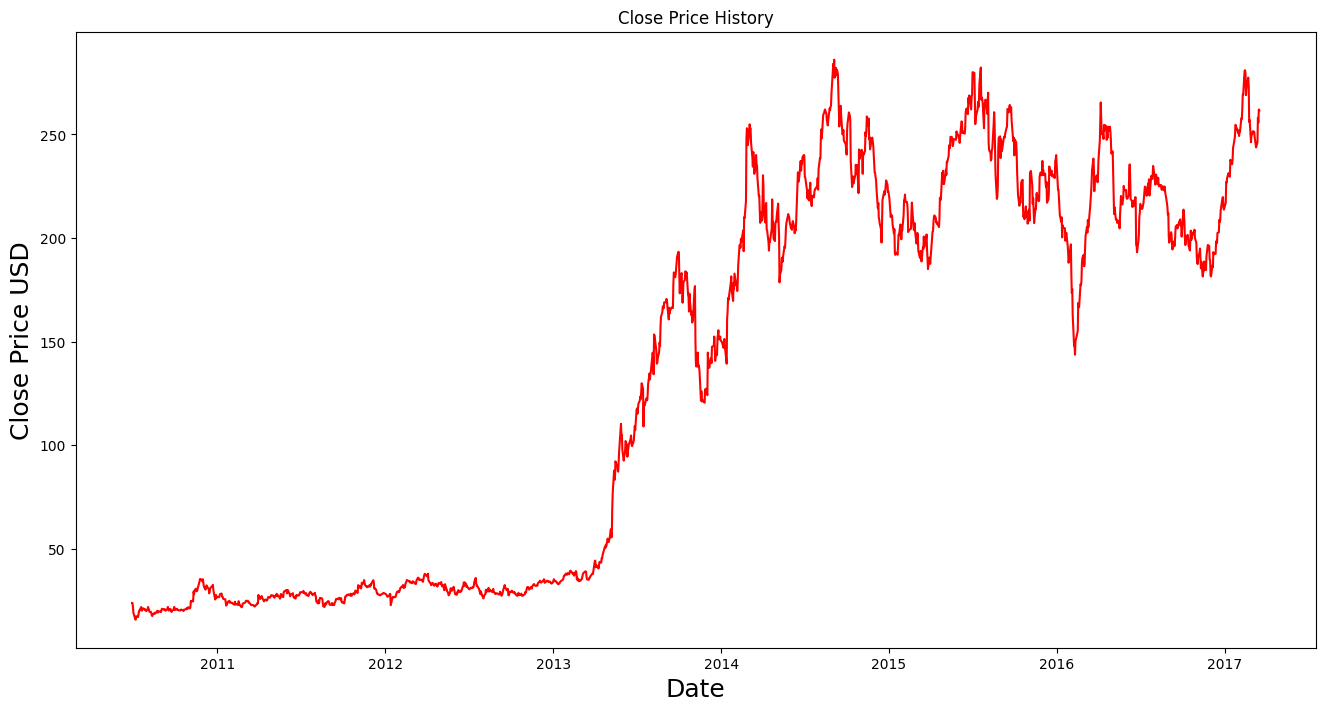

In [6]:
#plotting the data
plt.figure(figsize=(16,8))
plt.plot(df['Close'], color='red')
plt.title('Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [8]:
# create a new data frame with only 'Close column'
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

1354

In [9]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [15]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
       0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
       0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
       0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
       0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
       0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
       0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
       0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
       0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
       0.01902013, 0.01639284, 0.01946418, 0.01839106, 0.01506069])]
[0.013913554154743983]



In [16]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [17]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1294, 60, 1)

In [18]:
#Built the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [23]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [24]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
1294/1294 [==============================] - 32s 22ms/step - loss: 0.0015 - accuracy: 7.7280e-04
Epoch 2/10
1294/1294 [==============================] - 29s 22ms/step - loss: 8.9333e-04 - accuracy: 7.7280e-04
Epoch 3/10
1294/1294 [==============================] - 30s 23ms/step - loss: 6.6439e-04 - accuracy: 7.7280e-04
Epoch 4/10
1294/1294 [==============================] - 29s 23ms/step - loss: 6.1352e-04 - accuracy: 7.7280e-04
Epoch 5/10
1294/1294 [==============================] - 29s 22ms/step - loss: 6.2609e-04 - accuracy: 7.7280e-04
Epoch 6/10
1294/1294 [==============================] - 28s 22ms/step - loss: 6.4297e-04 - accuracy: 7.7280e-04
Epoch 7/10
1294/1294 [==============================] - 29s 23ms/step - loss: 5.8161e-04 - accuracy: 7.7280e-04
Epoch 8/10
1294/1294 [==============================] - 28s 22ms/step - loss: 6.2296e-04 - accuracy: 7.7280e-04
Epoch 9/10
1294/1294 [==============================] - 29s 22ms/step - loss: 4.8970e-04 - accuracy: 7.7280e

In [25]:
#create the testing data sets
#create a new array containing scale values from index 1543 to 2003
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [26]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [27]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(338, 60, 1)

In [28]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 2s 22ms/step


In [29]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.1160279706568976

C:\Users\Al-Masa\AppData\Local\Temp\ipykernel_14328\3407963551.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


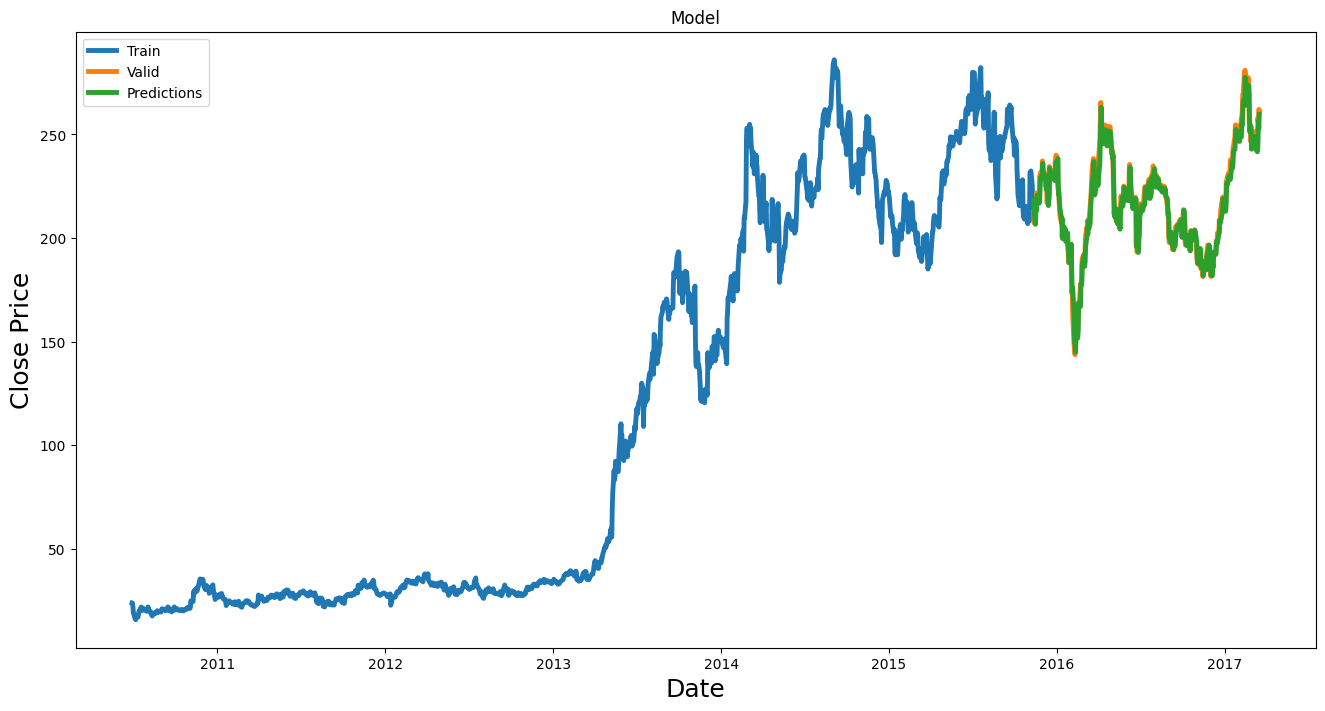

In [43]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close']],linewidth=3.5)
plt.plot(valid[['Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'])
plt.show()

In [44]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2015-11-12,212.940002,218.414795
2015-11-13,207.190002,212.121902
2015-11-16,214.309998,206.594131
2015-11-17,214.000000,213.901443
2015-11-18,221.070007,213.257019
...,...,...
2017-03-13,246.169998,241.592850
2017-03-14,258.000000,244.252335
2017-03-15,255.729996,256.312408


In [45]:
#get the quote
tesla_quote = pd.read_csv('Tesla.csv')
#Create new data frame
new_df = tesla_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days 
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 0s 36ms/step


array([[258.39624]], dtype=float32)